## Introduction to Data Science

### Unsupervised Methods - Clustering

This notebook is based on [this](https://towardsdatascience.com/unsupervised-learning-with-python-173c51dc7f03) post.

In [1]:
import re
import os
import codecs
import string
import numpy as np
import pandas as pd
import gensim

import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import feature_extraction
from sklearn import datasets
from sklearn.cluster import KMeans

import pyLDAvis
import pyLDAvis.gensim

from IPython.display import display, Image
from IPython.core.interactiveshell import InteractiveShell

%matplotlib inline
#%matplotlib notebook

Unsupervised Learning is a class of Machine Learning techniques to find the patterns in data. The data given to unsupervised algorithm are not labelled, which means only the input variables(X) are given with no corresponding output variables. In unsupervised learning, the algorithms are left to themselves to discover interesting structures in the data.  

Supervised Vs Unsupervised Learning.

In supervised learning, the system tries to learn from the previous examples that are given. (On the other hand, in unsupervised learning, the system attempts to find the patterns directly from the example given.) So if the dataset is labelled it comes under a supervised problem, it the dataset is unlabelled then it is an unsupervised problem.  

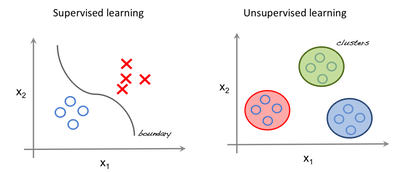

In [2]:
display(Image(os.path.join('../datasets/','Figs', 'sup-unsup.png'), width=600))

The image to the left is an example of supervised learning; we use regression techniques to find the best fit line between the features. While in unsupervised learning the inputs are segregated based on features and the prediction is based on which cluster it belonged.
Important Terminology

+ Feature: An input variable used in making predictions.

+ Predictions: A model’s output when provided with an input example.

+ Example: One row of a data set. An example contains one or more features and possibly a label.

+ Label: Result of the feature.

Preparing data for Unsupervised Learning

In this article we use, Iris dataset for making our very first predictions. The dataset contains a set of 150 records under 5 attributes — Petal Length , Petal Width , Sepal Length , Sepal width and Class. Iris Setosa, Iris Virginica and Iris Versicolor are the three classes. For our Unsupervised Algorithm we give these four features of the Iris flower and predict which class it belongs to.

We use sklearn Library in Python to load Iris dataset, and matplotlib for data visualisation.

In [3]:
# Loading dataset
iris_df = datasets.load_iris()

# Available methods on dataset
print(dir(iris_df))

['DESCR', 'data', 'feature_names', 'target', 'target_names']


In [4]:
# Features
print(iris_df.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
# Targets
print(iris_df.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
# Target Names
print(iris_df.target_names)
label = {0: 'red', 1: 'blue', 2: 'green'}

['setosa' 'versicolor' 'virginica']


In [7]:
# Dataset Slicing
x_axis = iris_df.data[:, 0]  # Sepal Length
y_axis = iris_df.data[:, 2]  # Sepal Width

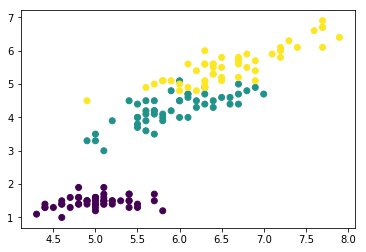

In [8]:
# Plotting
plt.scatter(x_axis, y_axis, c=iris_df.target)
plt.show()

K-Means Clustering in Python

K means is an iterative clustering algorithm that aims to find local maxima in each iteration. Initially desired number of clusters are chosen. Since we know that there are 3 classes involved, we program the algorithm to group the data into 3 classes, by passing the parameter “n_clusters” into our KMeans model. Now randomly three points(inputs) are assigned into three cluster. Based on the centroid distance between each points the next given inputs are segregated into respected clusters. Now, re-computing the centroids for all the clusters.

Each centroid of a cluster is a collection of feature values which define the resulting groups. Examining the centroid feature weights can be used to qualitatively interpret what kind of group each cluster represent.

We import KMeans model from sklearn library, fit out features and predict.

K Means Implementation in Python.

In [9]:
# Loading dataset
iris_df = datasets.load_iris()

# Declaring Model
model = KMeans(n_clusters=3)

# Fitting Model
model.fit(iris_df.data)

# Predicitng a single input
predicted_label = model.predict([[7.2, 3.5, 0.8, 1.6]])

# Prediction on the entire data
all_predictions = model.predict(iris_df.data)

# Printing Predictions
print(predicted_label)
print(all_predictions)

[1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


Hierarchical Clustering

Hierarchical clustering, as the name implies is an algorithm that builds a hierarchy of clusters. This algorithm begins with all the data assigned to a cluster of their own. Then two closest clusters are joined into the same cluster. In the end, this algorithm ends when there is only a single cluster left.

The completion of hierarchical clustering can be shown using dendrogram. Now let’s see an example of hierarchical clustering of grain data. The dataset can be found here.

Hierarchical Clustering Implementation in Python.

https://raw.githubusercontent.com/vihar/unsupervised-learning-with-python/master/seeds-less-rows.csv

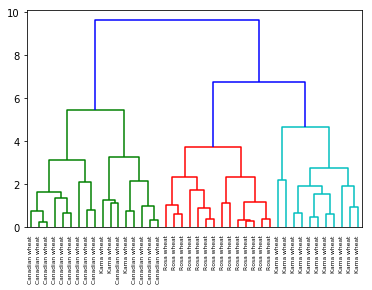

In [10]:
# Importing Modules
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd

# Reading the DataFrame
seeds_df = pd.read_csv("https://raw.githubusercontent.com/vihar/unsupervised-learning-with-python/master/seeds-less-rows.csv")

# Remove the grain species from the DataFrame, save for later
varieties = list(seeds_df.pop('grain_variety'))

# Extract the measurements as a NumPy array
samples = seeds_df.values

"""
Perform hierarchical clustering on samples using the
linkage() function with the method='complete' keyword argument.
Assign the result to mergings.
"""
mergings = linkage(samples, method='complete')

"""
Plot a dendrogram using the dendrogram() function on mergings,
specifying the keyword arguments labels=varieties, leaf_rotation=90,
and leaf_font_size=6.
"""
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
           )

plt.show()

Difference between K Means and Hierarchical clustering

    Hierarchical clustering can’t handle big data well but K Means clustering can. This is because the time complexity of K Means is linear i.e. O(n) while that of hierarchical clustering is quadratic i.e. O(n2).
    In K Means clustering, as we start with an arbitrary choice of clusters, the results generated by running the algorithm multiple times might differ. While results are reproducible in Hierarchical clustering.
    K Means is found to work well when the shape of the clusters is hyper spherical (like circle in 2D, sphere in 3D).
    K-Means doesn't allow noisy data, while in Hierarchical we can directly use noisy dataset for clustering.

t-SNE Clustering

It is one of the unsupervised learning method for visualisation. t-SNE stands for t-distributed stochastic neighbor embedding. It maps high dimensional space into a 2 or 3 dimensional space which can be visualised. Specifically, it models each high-dimensional object by a two- or three-dimensional point in such a way that similar objects are modeled by nearby points and dissimilar objects are modeled by distant points with high probability.

t-SNE Clustering Implementation in Python for Iris Dataset.

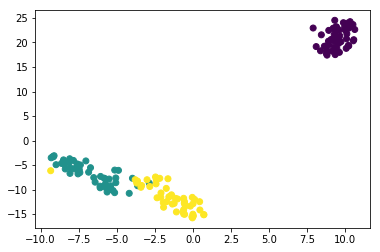

In [11]:
# Importing Modules
from sklearn import datasets
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Loading dataset
iris_df = datasets.load_iris()

# Defining Model
model = TSNE(learning_rate=100)

# Fitting Model
transformed = model.fit_transform(iris_df.data)

# Plotting 2d t-Sne
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis, c=iris_df.target)
plt.show()

Here as the Iris dataset has four features(4d) it is transformed and represented in two dimensional figure. Similarly t-SNE model can be applied to a dataset which has n-features.
DBSCAN Clustering

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular clustering algorithm used as an replacement to K-means in predictive analytics. It doesn’t require that you input the number of clusters in order to run. But in exchange, you have to tune two other parameters.

The scikit-learn implementation provides a default for the eps and min_samples parameters, but you’re generally expected to tune those. The eps parameter is the maximum distance between two data points to be considered in the same neighborhood. The min_samples parameter is the minimum amount of data points in a neighborhood to be considered a cluster.

DBSCAN Clustering in Python

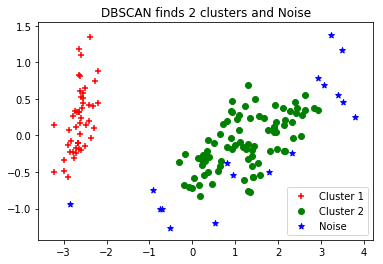

In [12]:
# Importing Modules
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Load Dataset
iris = load_iris()

# Declaring Model
dbscan = DBSCAN()

# Fitting
dbscan.fit(iris.data)

# Transoring Using PCA
pca = PCA(n_components=2).fit(iris.data)
pca_2d = pca.transform(iris.data)

# Plot based on Class
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')

plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Noise'])
plt.title('DBSCAN finds 2 clusters and Noise')
plt.show()

More Unsupervised Techniques:

    Principal Component Analysis (PCA)
    Anomaly detection
    Autoencoders
    Deep Belief Nets
    Hebbian Learning
    Generative Adversarial Networks(GANs)
    Self-Organizing maps